In [6]:
import os
import glob
import pandas as pd

x = glob.glob('./results/*.csv')
x

['./results/SelectionSort.csv',
 './results/HeapSort.csv',
 './results/MergeSort.csv',
 './results/BubbleSort.csv',
 './results/RadixSort.csv',
 './results/InsertionSort.csv',
 './results/ShellSort.csv',
 './results/RandomizedQuickSort.csv',
 './results/CountingSort.csv']

In [7]:
result_df = pd.DataFrame()
for csv in x:
    df = pd.read_csv(csv)
    df['sorter'] = csv.split('.')[1].split('/')[-1]
    result_df = pd.concat([result_df, df], axis=0)
result_df.sort_values('size').describe()

,elapsed_time,size,min_value,max_value
count,5.363000e+03,5363.000000,5.363000e+03,5.363000e+03
mean,3.914680e+01,14477.980608,2.672633e+05,2.147086e+07
std,1.824174e+02,23672.062453,1.461521e+06,3.887380e+07
min,9.779997e-07,1.000000,0.000000e+00,1.000000e+00
25%,4.056100e-05,10.000000,1.000000e+00,1.000000e+04
50%,2.672744e-02,1000.000000,1.000000e+01,1.000000e+06
75%,7.736651e-01,15000.000000,1.000000e+03,1.000000e+07
max,2.474012e+03,100000.000000,1.000000e+07,1.000000e+08


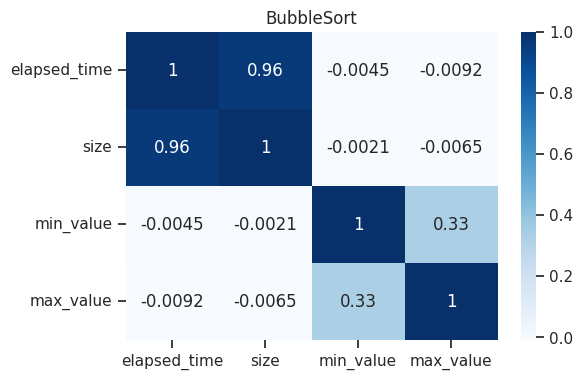

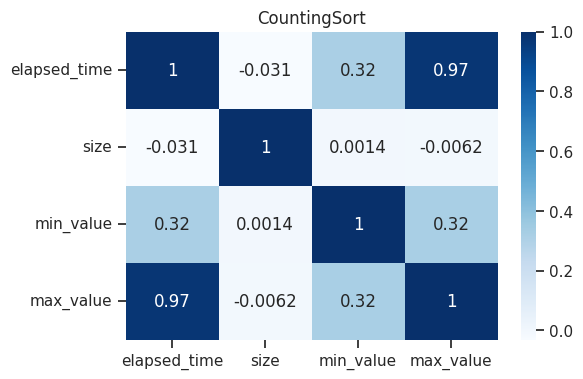

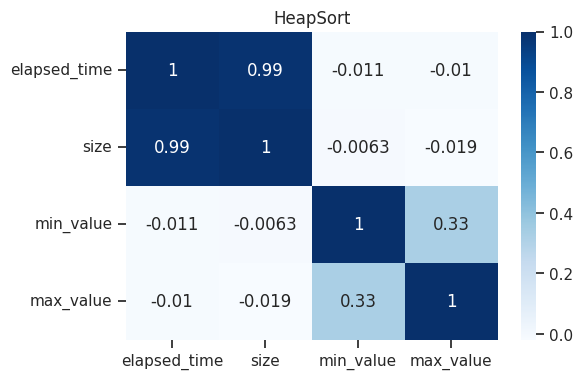

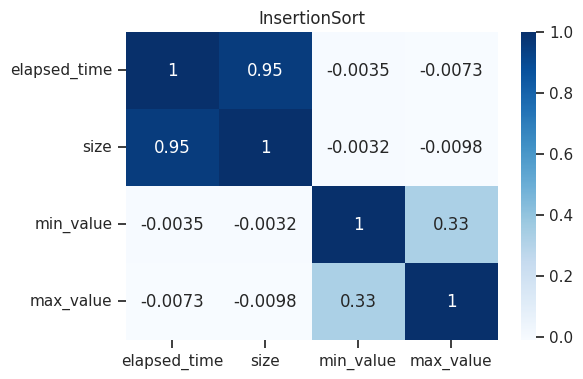

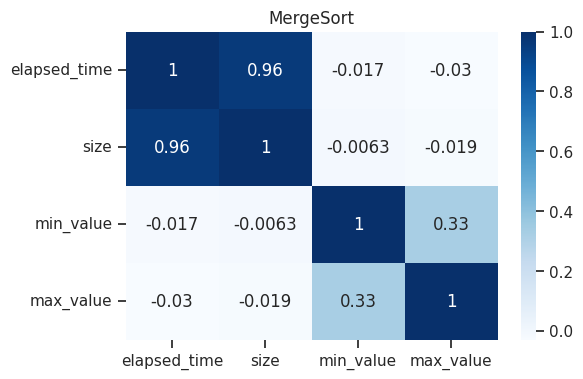

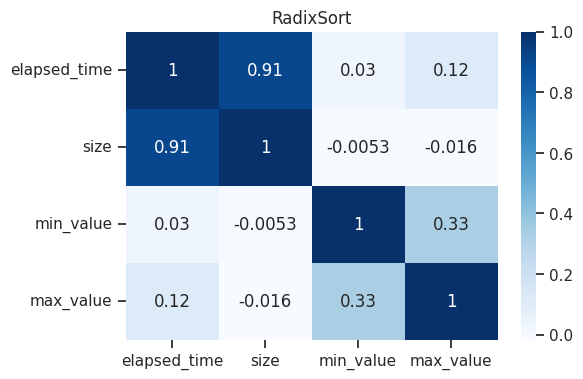

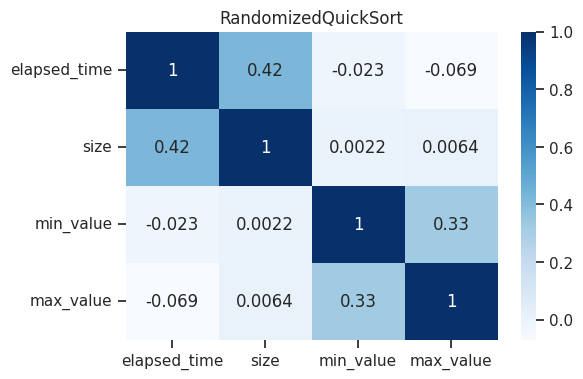

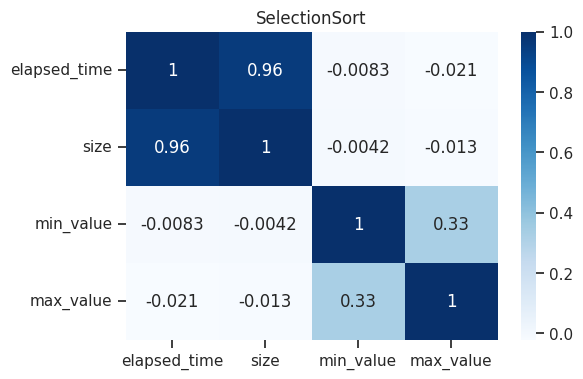

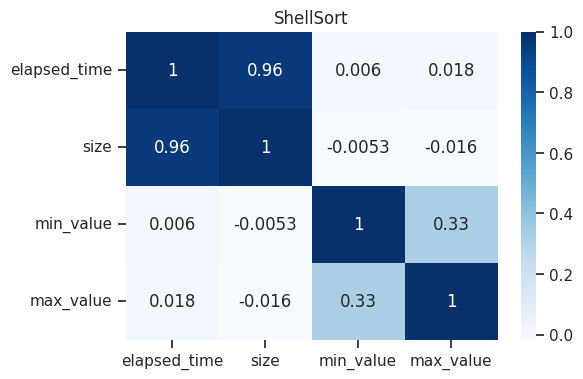

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sorters = sorted(result_df['sorter'].unique())

# Assuming your DataFrame is named 'result_df'
numeric_columns = ['elapsed_time', 'size', 'min_value', 'max_value']

# Calculate and visualize the correlation matrix for each unique sorter
for sorter in sorters:
    sorter_df = result_df[result_df['sorter'] == sorter]
    numeric_df = sorter_df[numeric_columns]
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
    plt.title(f"{sorter}")
    plt.show()


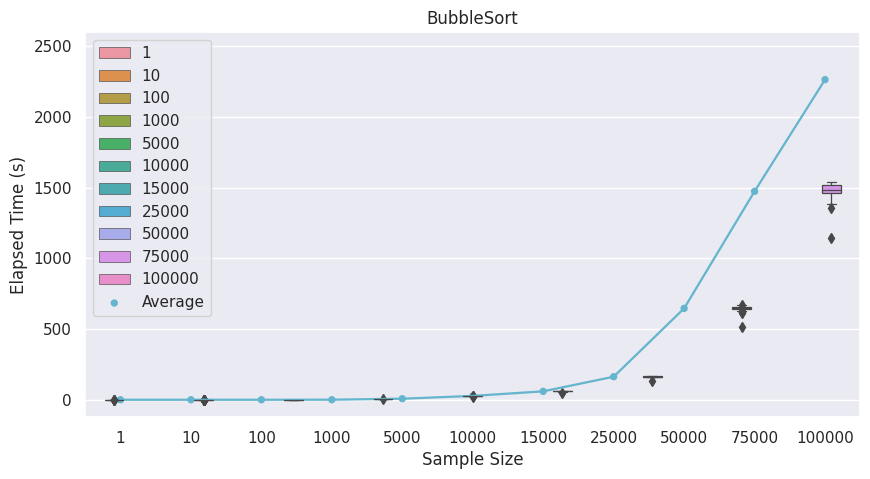

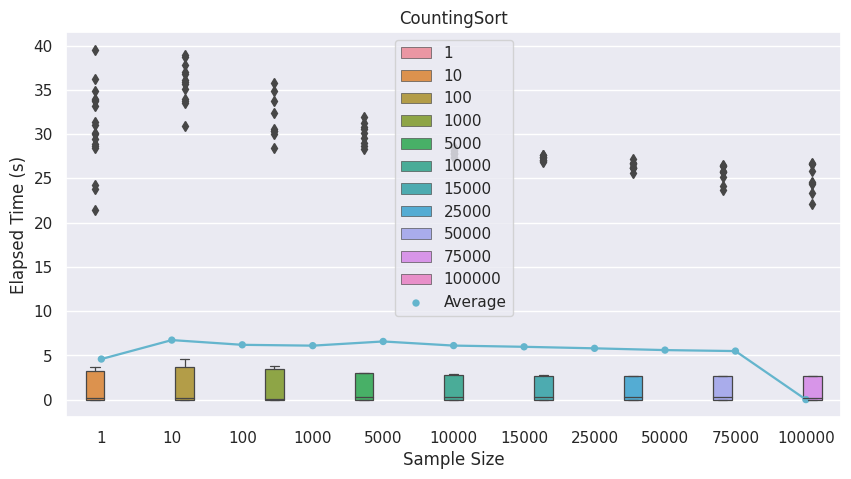

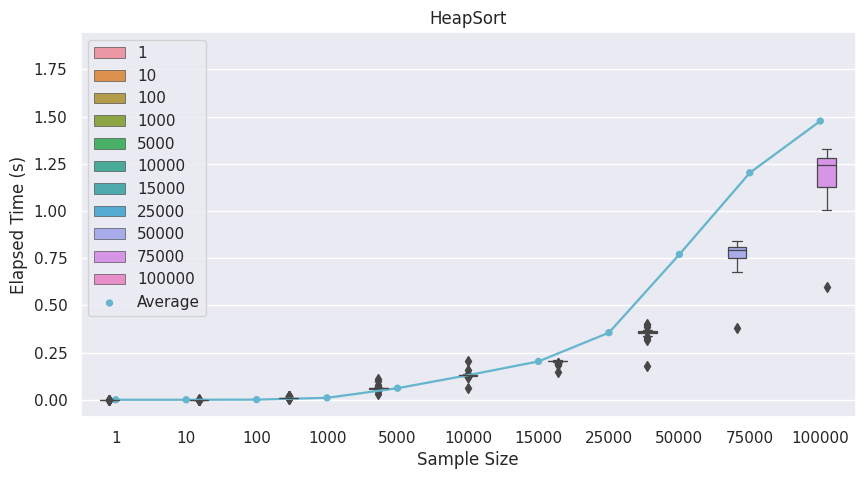

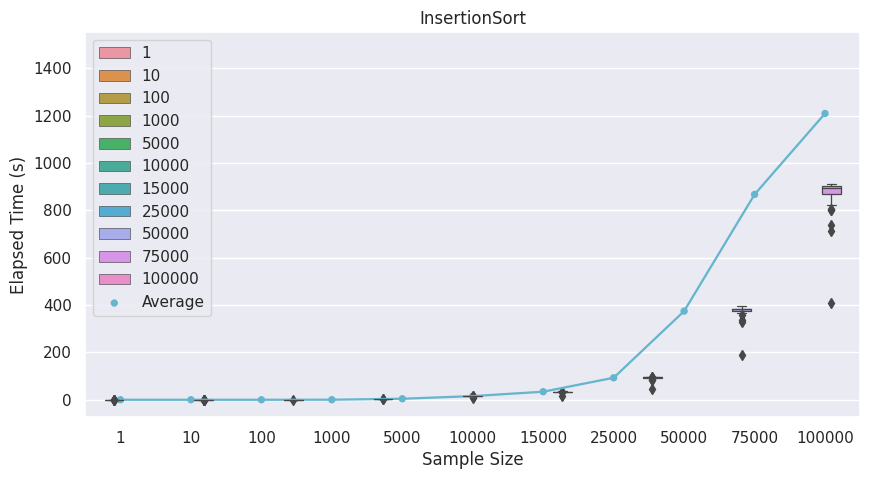

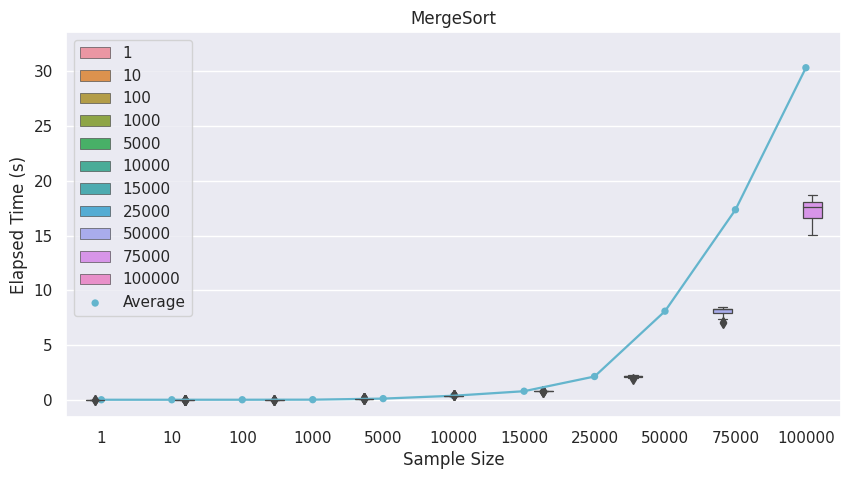

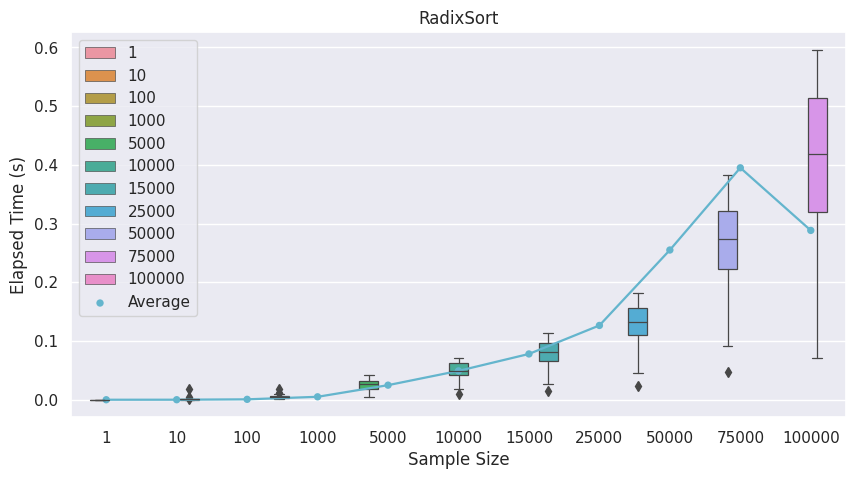

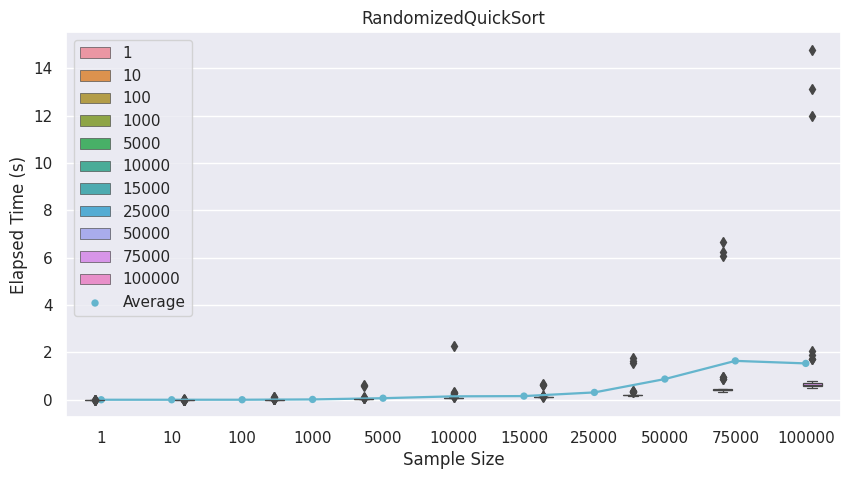

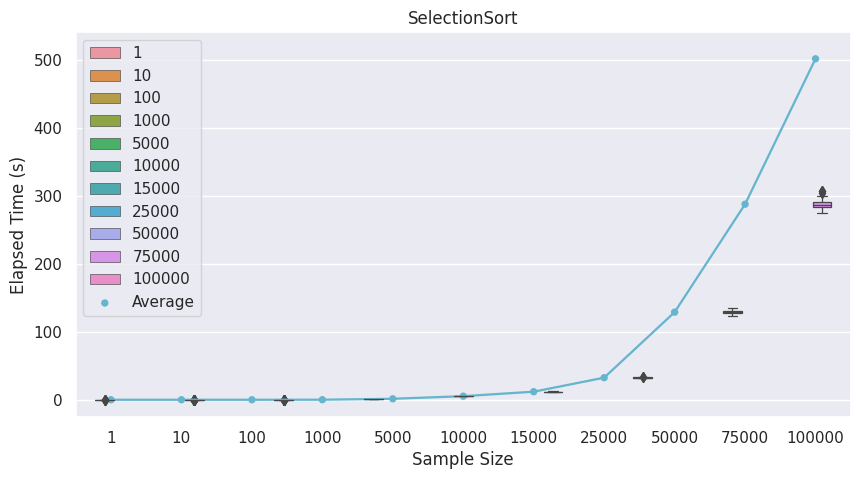

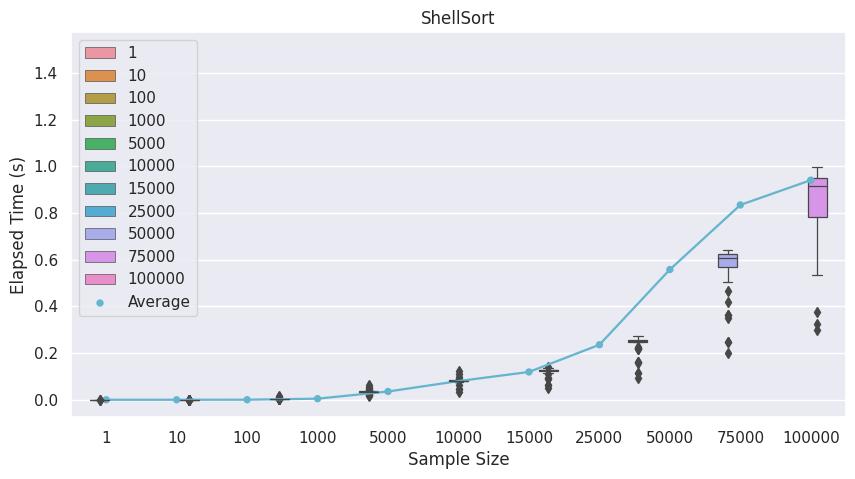

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"lines.linewidth": 0.9})

for sorter in sorters:
    sorter_df = result_df[result_df['sorter'] == sorter]

    # Create a new figure for each sorter
    plt.figure(figsize=(10, 5))
    # Plot the box plot
    sns.boxplot(x='size', y='elapsed_time', data=sorter_df, hue='size', width=3)

    # Plot the mean line
    time_trend = sorter_df.groupby('size')['elapsed_time'].mean().reset_index()
    sns.pointplot(data=time_trend, x='size', y='elapsed_time', label='Average', color="c")

    plt.xlabel('Sample Size')
    plt.ylabel('Elapsed Time (s)')
    plt.title(f'{sorter}')
    plt.legend()
    plt.show()


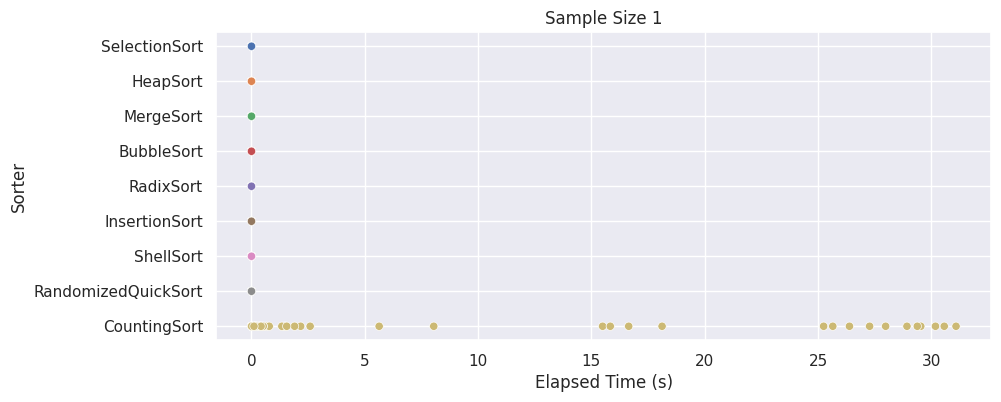

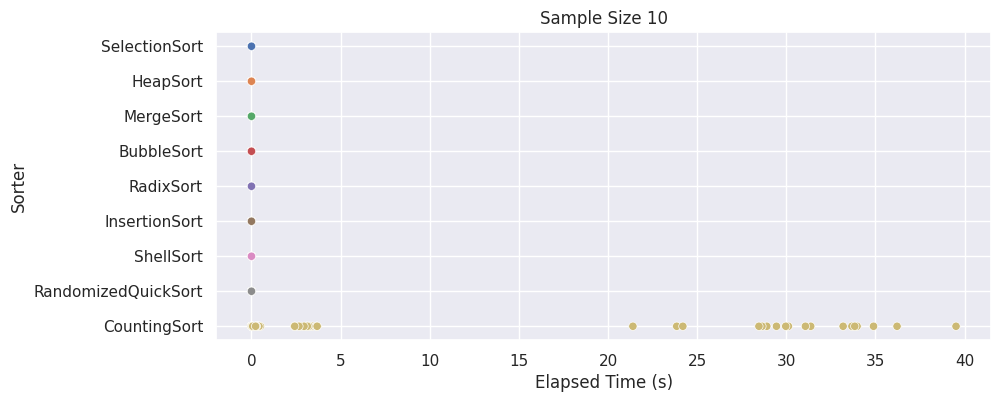

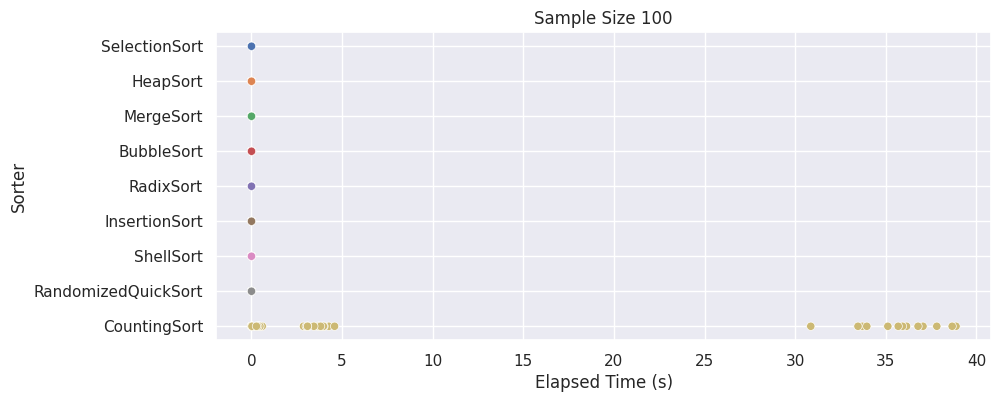

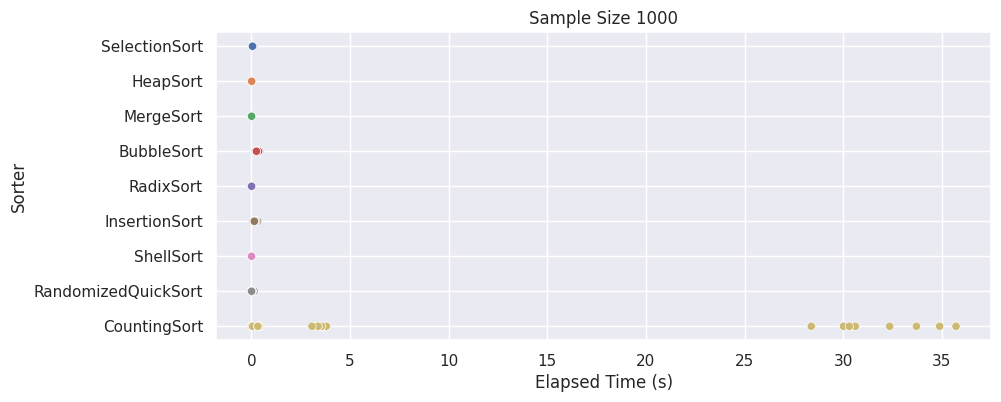

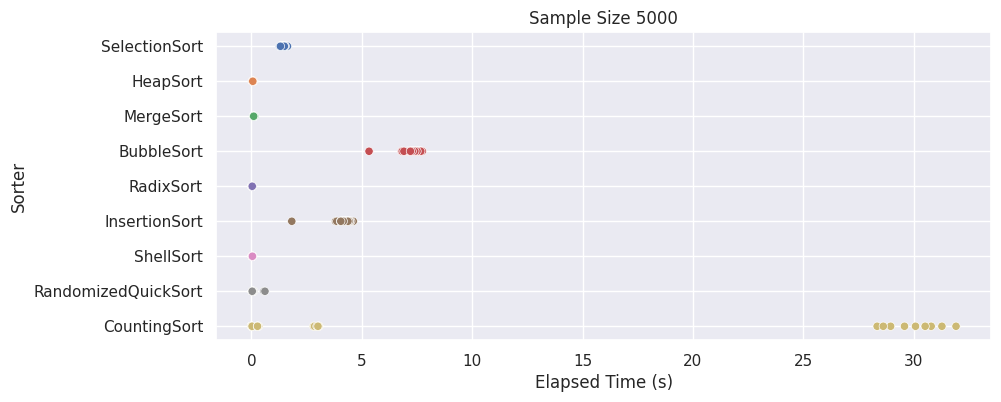

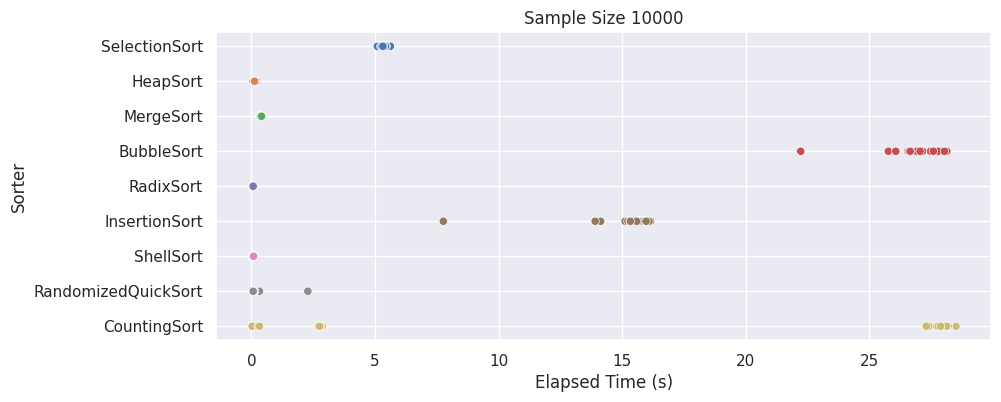

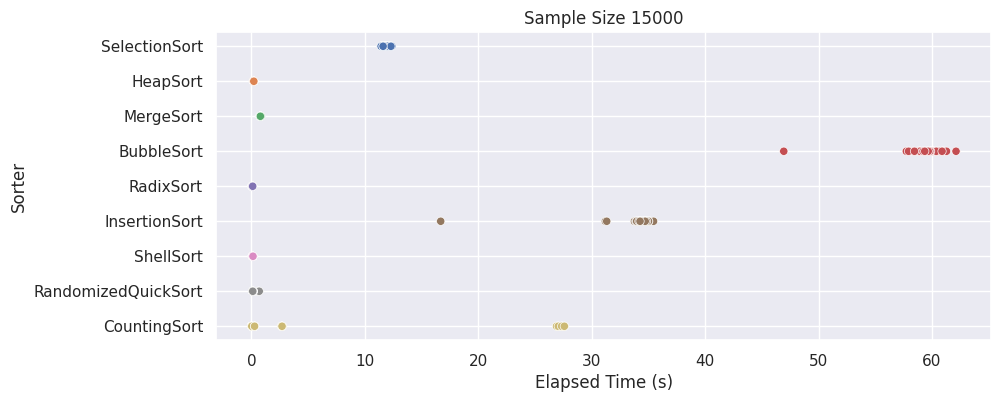

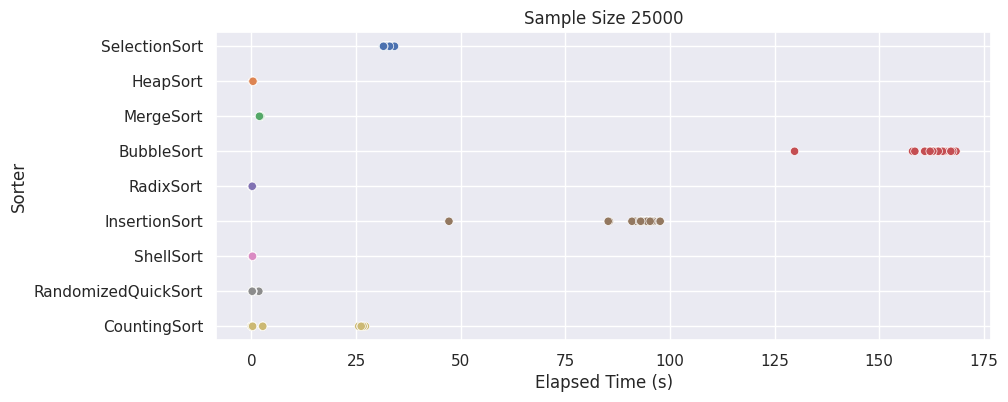

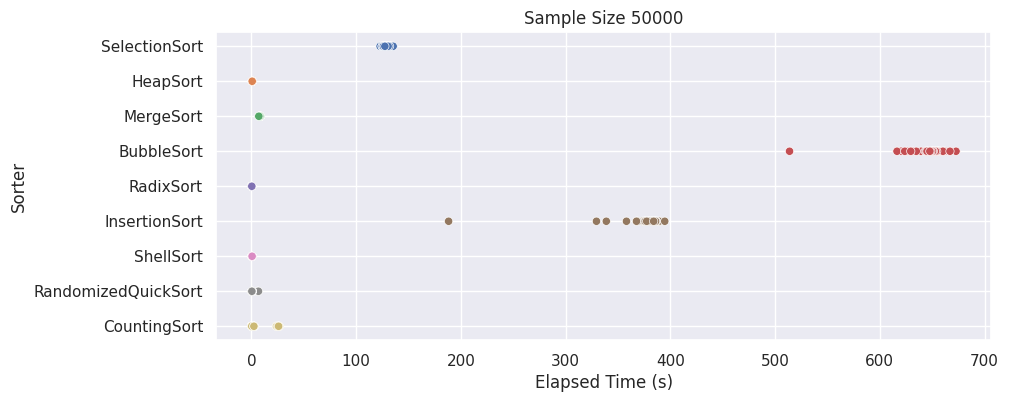

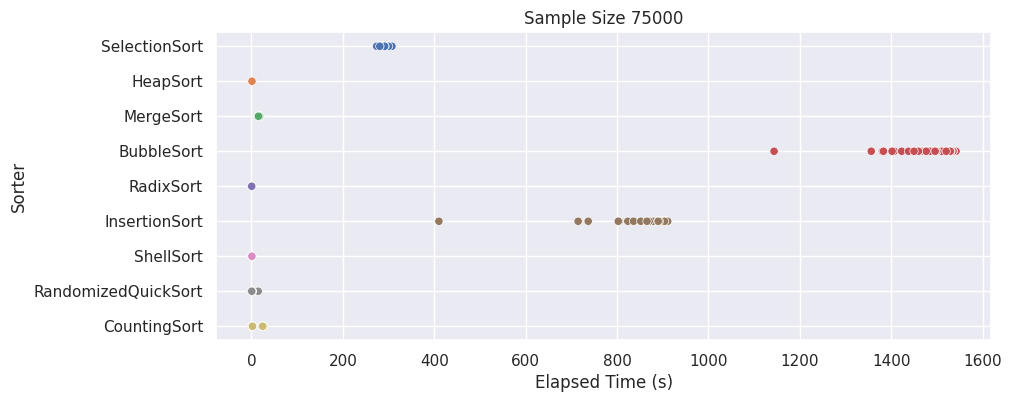

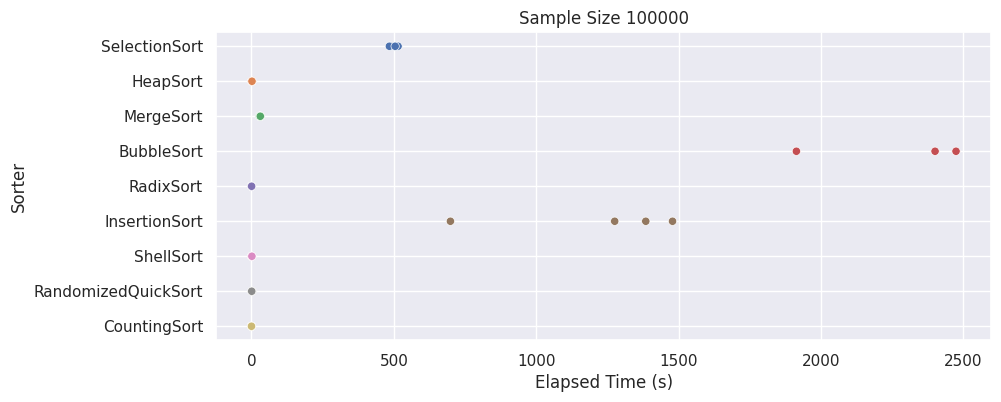

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sizes = result_df['size'].unique()
for size in sizes:
    sorter_df = result_df[result_df['size'] == size]
    time_trend = sorter_df
    plt.figure(figsize=(10, 4))
    # Create a new figure for each sorter
    # Plot the scatter values
    sns.scatterplot(x='elapsed_time', y='sorter', data=sorter_df, hue='sorter', legend=False)
    # Plot the mean with scatter markers
    # plt.scatter(time_mean.index, time_mean.values, marker='o', color='red', label='Mean')

    plt.ylabel('Sorter')
    plt.xlabel('Elapsed Time (s)')
    plt.title(f'Sample Size {size}')
    plt.show()
